### A very simple linear regression model, showing how to use datasets: BLI vs GDP.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression. Ridge
from sklearn.neighbors import KNeighborsRegressor

In [2]:
bli_df = pd.read_csv('data/oecd_bli_2015.csv', thousands=',')
gdp_df = pd.read_csv('data/gdp_per_capita.csv',thousands=',',encoding='latin1',na_values='n/a')

## GDP vs Life Satisfaction

#### Data Preprocessing

In [3]:
bli = bli_df[bli_df["INEQUALITY"]=="TOT"]
bli = bli.pivot(index="Country", columns="Indicator", values="Value")
bli = bli[['Life satisfaction']]

In [4]:
gdp_df.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_df.set_index('Country',inplace=True)
gdp = gdp_df[['GDP per capita']]

In [5]:
stats = pd.merge(left=bli, right=gdp,left_index=True, right_index=True)
stats.sort_values(by="GDP per capita", inplace=True)

In [6]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
stats_partial = stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
stats_removed = stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [7]:
len(stats_partial.index)

29

In [8]:
len(stats)

36

#### Data Visualization

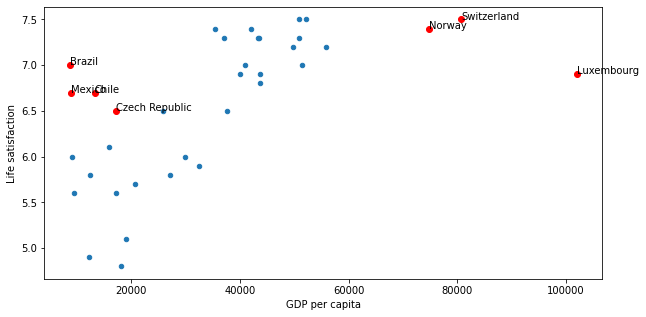

In [9]:
stats_partial.plot(kind='scatter', x='GDP per capita', y='Life satisfaction',figsize=(10,5))
# plt.axis([0, 60000, 0, 10])

for country, row in stats_removed.iterrows():
    pos_data_x, pos_data_y = row['GDP per capita'], row['Life satisfaction']
    plt.annotate(country, xy=(pos_data_x, pos_data_y))
    plt.plot(pos_data_x, pos_data_y, "ro") 

plt.show()

#### Model Fitting

In [10]:
# LINEAR REGRESSION - using partial stats training data which consists of 29 countries to train the model

X_partial = np.c_[stats_partial["GDP per capita"]]
y_partial = np.c_[stats_partial["Life satisfaction"]]

model_LR = LinearRegression()
model_LR.fit(X_partial,y_partial)

#eg. predict BLI for Cyprus
gdp_cyprus = gdp.loc['Cyprus'][0]
bli_cyprus_partial = model_LR.predict([[gdp_cyprus]])
print(gdp_cyprus, bli_cyprus_partial)

22587.49 [[5.96244744]]


In [11]:
# LINEAR REGRESSION FULL - using full stats training data which consists of 36 countries to train the model

X_full = np.c_[stats["GDP per capita"]]
y_full = np.c_[stats["Life satisfaction"]]

model_LR_full = LinearRegression()
model_LR_full.fit(X_full,y_full)



#eg. predict BLI for Cyprus
bli_cyprus_full = model_LR_full.predict([[gdp_cyprus]])
print(gdp_cyprus, bli_cyprus_full)

22587.49 [[6.28654773]]


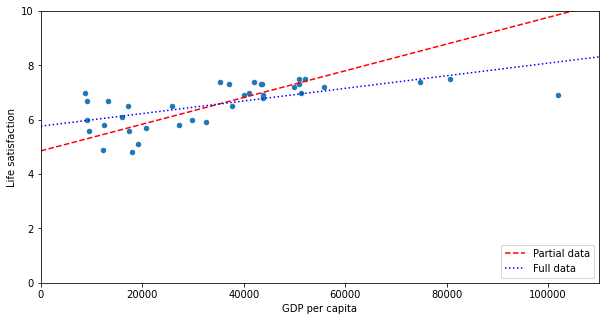

In [12]:
stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,5))
plt.axis([0, 110000, 0, 10])
X = np.linspace(0,110000,1000)

t0_partial, t1_partial = model_LR.intercept_, model_LR.coef_
t0_full, t1_full = model_LR_full.intercept_, model_LR_full.coef_

Y_partial = t0_partial + t1_partial*X
Y_full = t0_full + t1_full*X

plt.plot(X, Y_partial[0], "r--", label="Partial data")
plt.plot(X, Y_full[0], "b:", label="Full data")

# plt.plot(gdp_cyprus, bli_cyprus, "ro")
plt.legend(loc="lower right")
plt.show()

In [13]:
gdp_test = gdp[~gdp.index.isin(bli.index)]
gdp_test = gdp_test.dropna()

In [14]:
predicted_bli = {}
for country,gdp_country in gdp_test.iterrows():
    predicted_bli[country] = model_LR_full.predict([[gdp_country[0]]])

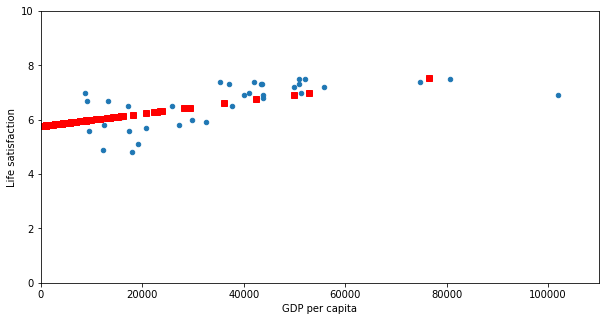

In [19]:
stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,5))
plt.axis([0, 110000, 0, 10])

for key,val in predicted_bli.items():
    gdp_country = gdp_test.loc[key]
    bli_country = val[0]
    plt.plot(gdp_country, bli_country, "rs")
#     plt.annotate(country, xy=(gdp_cyprus, bli_cyprus))
plt.show()

In [21]:
X_full = np.c_[stats["GDP per capita"]]
y_full = np.c_[stats["Life satisfaction"]]

model_KNN = KNeighborsRegressor()
model_KNN.fit(X_full,y_full)

bli_cyprus_knn = model_KNN.predict([[gdp_cyprus]])
print(gdp_cyprus, bli_cyprus_knn)

22587.49 [[5.58]]
